# Investigating emergency response times

Note: This example use case presents an approach to using ArcGIS to find out which areas are within a four-minute drive time of a fire station in a particular city. While the data is real, the scenario, analysis, and resulting decisions are hypothetical. The purpose of the example is to illustrate the type of problem that can be addressed using the drive-time areas.

Prompted by a series of articles about emergency response times in a nearby large metropolitan area, a reporter for the local newspaper is writing an article on fire response times in her small city. To accompany the article, the reporter wants to include maps showing the areas of the city within a four-minute drive of a fire station. Her research has found that's a common standard for many cities.

Connect your ArcGIS online organization.

In [1]:
from arcgis import *

In [2]:
gis = GIS("https://deldev.maps.arcgis.com", "demos_deldev", "DelDevs12")

Accessing the content property of your gis object you can use the search() method.

In [3]:
items = gis.content.search('title:layers')

In [4]:
items

[<Item title:"Layers" type:Feature Layer Collection owner:demos_deldev>,
 <Item title:"Layers" type:Service Definition owner:demos_deldev>,
 <Item title:"layer_2am_" type:Feature Layer Collection owner:demos_deldev>,
 <Item title:"dissolved Layer1" type:Feature Layer Collection owner:demos_deldev>,
 <Item title:"unemployment_layer" type:Feature Layer Collection owner:demo_deldev>]

Importing the display module

<Item title:"Layers" type:Feature Layer Collection owner:demos_deldev>
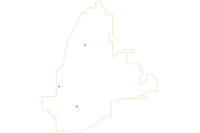

<Item title:"Layers" type:Service Definition owner:demos_deldev>
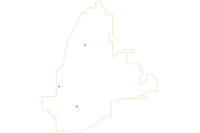

<Item title:"layer_2am_" type:Feature Layer Collection owner:demos_deldev>
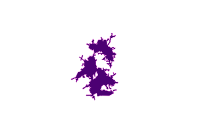

<Item title:"dissolved Layer1" type:Feature Layer Collection owner:demos_deldev>

<Item title:"unemployment_layer" type:Feature Layer Collection owner:demo_deldev>

In [5]:
from IPython.display import display
for item in items:
    display(item)

Getting the first item

In [6]:
drive_item = items[0]

Since the item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [7]:
fire_station = drive_item.layers[0]

In [8]:
city_bound = drive_item.layers[1]

<Item title:"Layers" type:Feature Layer Collection owner:demos_deldev>
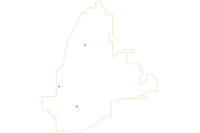

In [9]:
drive_item

![](drive_time_img/2.PNG) 
![](drive_time_img/3.PNG)

Creating drive-time areas
To create the maps, the reporter will create drive-time areas around each fire station. Drive-time areas display the area within a specified distance or drive time of a location—in this case, four minutes.

To start, the reporter adds the locations of fire stations from the city's online GIS database. After opening the drive-time analysis tool, she sees that she can specify the drive time using different traffic conditions by selecting a day of the week and time of day. She decides to see if the area covered within four minutes of a fire station changes during heavy and light traffic—say Friday afternoon rush hour versus 2:00 a.m. on a weekday. Including these maps will add some more interest to her story.

## Find areas within a four-minute drive time of a fire station during both light and heavy traffic conditions

Use the Create Drive-Time Areas tool to find areas within four minutes of a fire station on a typical Tuesday morning at 2:00 a.m. Use the Dissolve option to create a single area rather than individual areas for each station.

In [10]:
from arcgis.features.use_proximity import create_drive_time_areas

In [12]:
area1 = create_drive_time_areas(fire_station, break_values=[4], break_units='Minutes', overlap_policy='Dissolve',
                        time_of_day='631245600000', output_name="area_within_four_mins")

In [13]:
arealyr = area1.layers[0]

The GIS object includes a map widget for displaying geographic locations, visualizing GIS content, as well as the results of your analysis. To use the map widget, call gis.map() and assign it to a variable.

In [16]:
m = gis.map('Poway')
m

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](drive_time_img/4.PNG)

In [17]:
m.add_layer(arealyr)

In [18]:
area2 = create_drive_time_areas(fire_station, break_values=[4], break_units='Minutes', overlap_policy='Dissolve',
                        time_of_day='631558800000', output_name="area_5pm_fri")

In [19]:
area2lyr = area2.layers[0]

In [20]:
m2 = gis.map('Poway')
m2

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [21]:
m2.add_layer(area2lyr)

![](drive_time_img/5.PNG)

The maps show that while a large portion of the city is covered within a four-minute drive time of a fire station, several neighborhoods are not. And during Friday afternoon rush hour, even more neighborhoods are more than four minutes from a station. She makes a note to interview community leaders in these neighborhoods.

## Find out how many minutes from a fire station the farthest parts of the city are

The reporter then decides to see how many minutes away from a station the farthest parts of the city are. She sees that she can create several drive-time areas at one time by entering multiple drive times. She enters 6, 8, 10, and 12 minutes. To assume the worst-case scenario, she again specifies Friday afternoon rush-hour traffic.

As it turns out, most of the city is within a six-minute drive time of a fire station, and almost all of the city is within eight minutes—including all of the densely populated areas. However, there are a few streets in the easternmost part of the city that are more than 12 minutes from a fire station, at least in rush-hour traffic. Interestingly, there are neighboring communities to the west that are closer to a city fire station than some areas inside the city limits.

Use Create Drive-Time Areas to find areas within 6, 8, 10, and 12 minutes of a fire station on a typical Friday afternoon at 5:00 p.m.

In [22]:
area3 = create_drive_time_areas(fire_station, break_values=[6,8,10,12], break_units='Minutes', overlap_policy='Dissolve',
                        time_of_day='631558800000', output_name="areas_within_multi_mins")

In [23]:
area3lyr = area3.layers[0]

In [24]:
m3 = gis.map('Poway')
m3

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [25]:
m3.add_layer(area3lyr)

![](drive_time_img/6.PNG)

With the maps in hand, the reporter can add some angles to her story that she hadn't considered at the outset. After the story—complete with maps—appears on the paper's website, the city council decides to take up the subject at their next meeting. They send a request to the fire chief to attend to discuss what needs to be done to ensure more of the city can be reached within a four-minute drive time of a fire station.